<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">8.1. Deep Learning MLP</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

## Seleccionar que tipo de ejecucion se va a realizar:

## AUTOMATICA o MANUAL (por defecto AUTOMATICA).

In [2]:
# escribir entre parentesis AUTOMATICA o MANUAL

EJECUCION = "MANUAL"

In [3]:
# en esta celda no ha de ser modificada 

if EJECUCION == "MANUAL":
    %run 3.Importaciones.ipynb

%run 4.VariablesClases.ipynb

In [4]:
display(HTML(html_h4('Realizo la importacion a Dataframe de los datos de los csv creados en la etapa de Prepocessing. ','purple')))

datosEEG_seg1_standarizado = pd.read_csv('../datos/csv/seg1_stscaler.csv', sep=',')
datosEEG_seg2_standarizado = pd.read_csv('../datos/csv/seg2_stscaler.csv', sep=',')
datosEEG_seg3_standarizado = pd.read_csv('../datos/csv/seg3_stscaler.csv', sep=',')
datosEEG_seg4_standarizado = pd.read_csv('../datos/csv/seg4_stscaler.csv', sep=',')
datosEEG_std_after = pd.read_csv('../datos/csv/all_stscaler_after.csv', sep=',')
datosEEG_std_before = pd.read_csv('../datos/csv/all_stscaler_before.csv', sep=',')


datosEEG_all = [datosEEG_seg1_standarizado, datosEEG_seg2_standarizado, datosEEG_seg3_standarizado, datosEEG_seg4_standarizado, datosEEG_std_after, datosEEG_std_before]
datosEEG_all_nombres = {'segmento_1':datosEEG_seg1_standarizado, 'segmento_2':datosEEG_seg2_standarizado, 'segmento_3':datosEEG_seg3_standarizado,'segmento_4':datosEEG_seg4_standarizado, 'all_std_after':datosEEG_std_after, 'all_std_before':datosEEG_std_before}
nombre_clases = valores_key(datosEEG_seg1_standarizado)

 # MLP Cassifier

In [5]:



with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(datosEEG_std_before)

,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,0.685458,-0.211643,-0.258454,-0.122479,-0.282657,-0.155326,-0.510750,-0.181465,-0.224642,0.306470,4.0
1,0.419765,0.382946,-0.354973,-0.384973,0.276687,0.919317,-0.658054,-0.499377,-0.484373,-0.311967,0.0
2,-0.333030,1.720772,-0.103935,-0.170506,-0.001648,-0.039951,-0.311257,-0.126709,-0.002001,0.525247,0.0
3,-1.395800,1.572125,-0.276007,1.586893,0.525398,0.458669,-0.075158,-0.930211,-0.654538,-0.662772,0.0
4,-0.908697,0.531593,-0.366409,-0.488698,-0.565414,-0.606238,-0.594252,-0.898449,-0.663097,-0.956619,0.0
5,-0.554440,-0.211643,-0.361266,-0.384117,-0.324212,-0.508510,0.442907,0.065422,-0.168701,-0.108681,0.0
6,-0.775851,0.036102,-0.149202,-0.215453,-0.067066,0.099521,-0.466647,-0.656726,-0.379319,-0.533126,0.0
7,0.375483,-0.409840,-0.122970,-0.027281,-0.537334,-0.170053,-0.235987,-0.093973,-0.016674,-0.126078,0.0
8,-0.067337,-0.261193,0.940932,0.092016,-0.466156,0.358993,-0.228049,-0.098163,-0.469598,-0.531220,1.0
9,-0.643004,0.531593,-0.344184,-0.322201,0.314641,-0.116016,-0.054282,-0.604017,-0.729737,-0.604860,1.0


In [4]:

# Defino los rangos de parámetros para MLP
param_grid_mlp = {
    'alpha': np.linspace(0.00001, 0.1, 10),  # Rango de valores para alpha
    'hidden_layer_sizes': [(50,), (100,), (200,), (500,), (1000,)]  # Rango de valores para neuronas en la capa oculta
}

model_MLP = MLPClassifier(max_iter=MAX_ITERACIONES)
grid_search_mlp = GridSearchCV(model_MLP, param_grid_mlp, cv=10)

In [5]:
accuracy_score_mlp = []
accuracy_score_test_mlp =[]
matriz_confusion_mlp = []
matriz_confusion_test_mlp = []

for dataset in datosEEG_all:
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataset)
        
    # Entrenar modelo
    grid_search_mlp.fit(X_train, y_train)
    best_model = grid_search_mlp.best_estimator_   
    print(grid_search_mlp.best_params_)
     
    # predict de X_Val
    y_predict_model = best_model.predict(X_val)    
    accuracy_score_mlp.append(accuracy_score(y_val, y_predict_model))       
    matriz_confusion_mlp.append(confusion_matrix(y_val, y_predict_model))
    
    
    # predict de X_test
    y_predict_model_test = best_model.predict(X_test)
    accuracy_score_test_mlp.append(accuracy_score(y_test, y_predict_model_test))
    matriz_confusion_test_mlp.append(confusion_matrix(y_test, y_predict_model_test))


{'alpha': 0.08889000000000001, 'hidden_layer_sizes': (500,)}
{'alpha': 0.011120000000000001, 'hidden_layer_sizes': (500,)}
{'alpha': 1e-05, 'hidden_layer_sizes': (1000,)}
{'alpha': 0.04445000000000001, 'hidden_layer_sizes': (500,)}
{'alpha': 0.022230000000000003, 'hidden_layer_sizes': (100,)}
{'alpha': 0.022230000000000003, 'hidden_layer_sizes': (1000,)}


,MLP_VAL
Segmento 1,0.416667
Segmento 2,0.200000
Segmento 3,0.388889
Segmento 4,0.111111
All Segmentos after,0.278689
All Segmentos before,0.344262


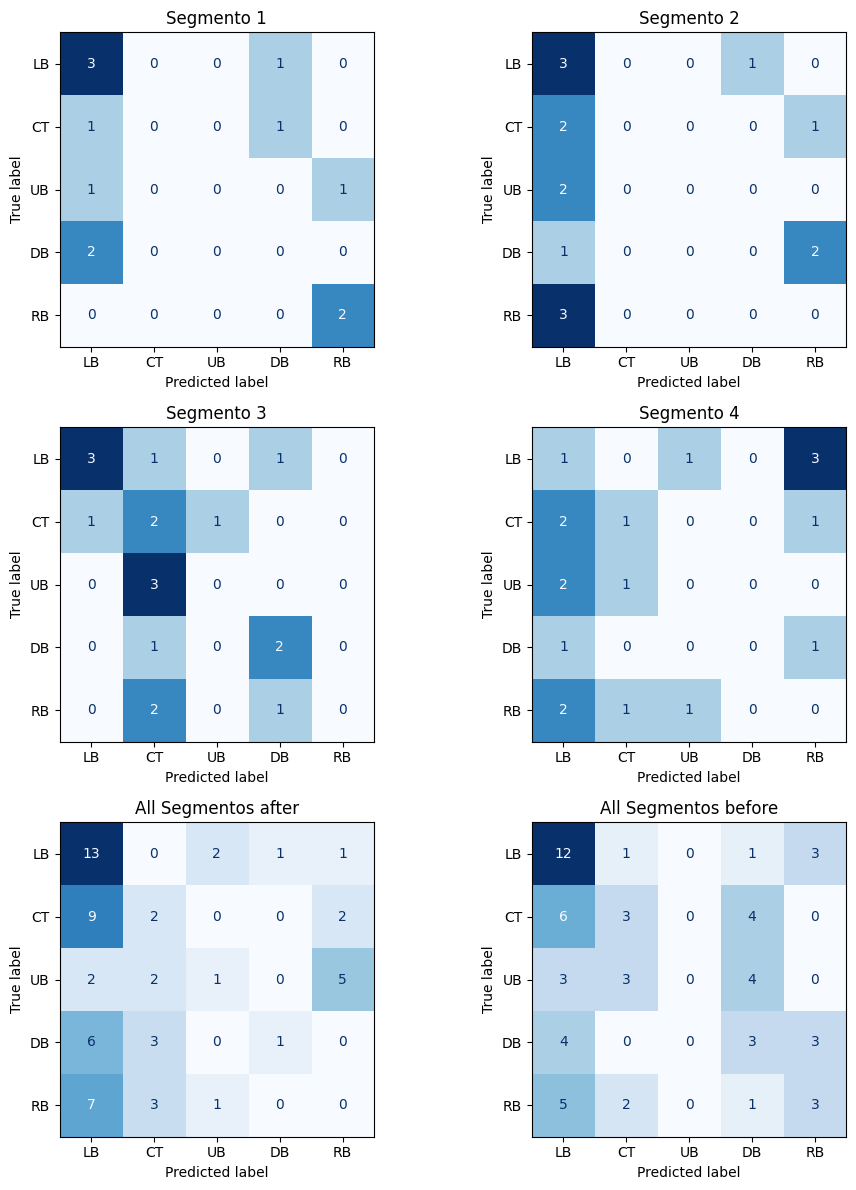

In [6]:
datos_mlp = pd.DataFrame(accuracy_score_mlp, columns=['MLP_VAL'], index=(titulos_all))

display(datos_mlp)

mc_mlp = []

for matrices_mlp in matriz_confusion_mlp:

    mc_mlp.append(pd.DataFrame(matrices_mlp, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en seis subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_mlp[0], mc_mlp[1], mc_mlp[2], mc_mlp[3], mc_mlp[4], mc_mlp[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()


,MLP_TEST
Segmento 1,0.538462
Segmento 2,0.312500
Segmento 3,0.450000
Segmento 4,0.150000
All Segmentos after,0.323529
All Segmentos before,0.323529


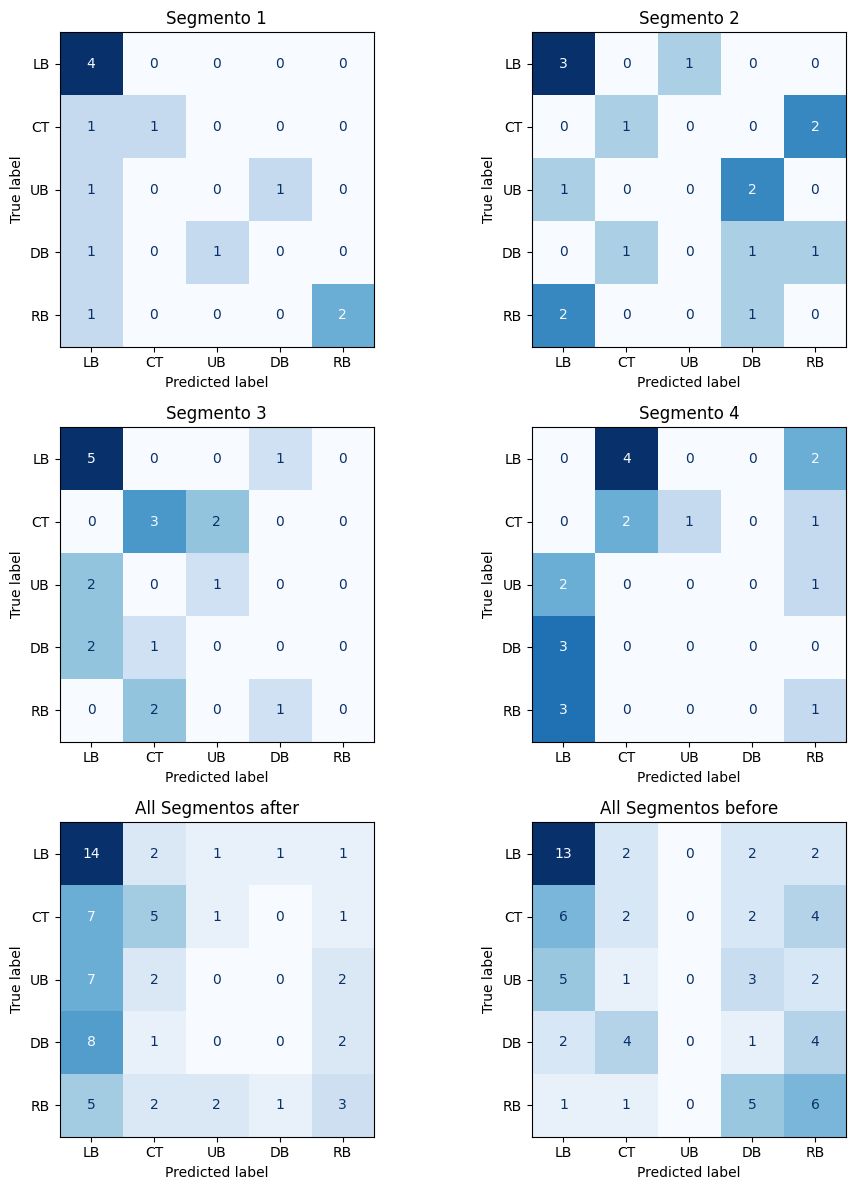

In [7]:
datos_mlp_test = pd.DataFrame(accuracy_score_test_mlp, columns=['MLP_TEST'], index=(titulos_all))

display(datos_mlp_test)

mc_mlp = []

for matrices_mlp in matriz_confusion_test_mlp:

    mc_mlp.append(pd.DataFrame(matrices_mlp, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en seis subgráficos
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_mlp[0], mc_mlp[1], mc_mlp[2], mc_mlp[3], mc_mlp[4], mc_mlp[5]]


# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos_all)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()

In [8]:
datos_mlp_test.to_csv(f'../datos/csv/datosEGG_MLP_test.csv', index=False)
datos_mlp.to_csv(f'../datos/csv/datosEGG_MLP_val.csv', index=False)